![](img/banner.png)
%%HTML
<script src="require.js"></script>

# Vector Quantization

## Sec 14.3.9 of ESL

**Mahmood Amintoosi, Fall 2024**

Computer Science Dept, Ferdowsi University of Mashhad

# Vector Quantization (VQ) and K-means Clustering

Based on Page 533 of [ESL](https://fumdrive.um.ac.ir/index.php/s/yWr8rw9j9P8CQmL)

Vector quantization (VQ) is a powerful technique used in image and signal compression. This method is particularly effective when combined with the K-means clustering algorithm, which helps reduce the amount of data needed to represent an image.

## Example: Grayscale Image Compression

Consider the grayscale coffee image with resolution of **400 x 600 pixels**, meaning it contains **240,000 pixels** in total. Each pixel represents a grayscale value between **0 and 255**, requiring **8 bits** of storage per pixel. Consequently, the full image occupies approximately 240 KB of storage.

### VQ Compression Steps

The following steps demonstrate how VQ compression is performed on this image:

1. **Block Partitioning**: The image is divided into **2x2 blocks** of pixels. This means each block contains **4 pixel values**, and the total number of blocks is **200 x 300**.

2. **K-means Clustering**: We apply the K-means clustering algorithm to the pixel blocks, treating each block as a vector in $\mathbb{R}^4$ (four-dimensional space). 

3. **Choosing K = 4**: This results in a significant reduction in quality, but a more significant reduction in storage.

4. **Encoding Step**: Each block of pixels is approximated by its closest cluster centroid, known as a **codeword**. The identity of the closest codeword for each block needs to be stored. This requires $log_2(K)$ bits per block.

5. **Decoding Step**: To reconstruct the approximated image, the centroids are used to create the final image. This step is called the **decoding step**.

### Storage Obligation

When K is reduced to 4, the storage requirement the storage for the
compressed image amounts to $log_2(K)/(4 \times 8) = 1/16 = 0.0625$ of the original image, equating to **0.50 bits per pixel**. 

The crucial steps in VQ involve encoding each block to its nearest codeword and then decoding the image using these codewords, illustrating how K-means can facilitate significant compression in image storage.

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
# from sklearn_extra.cluster import KMedoids
from skimage import io
from skimage import data
from skimage.color import rgb2gray

In [37]:
coffee = data.coffee()
img = rgb2gray(coffee)
m, n = img.shape
print(m,n,type(img[0,0]))
print(img.min(),img.max())

400 600 <class 'numpy.float64'>
0.0002827450980392157 1.0


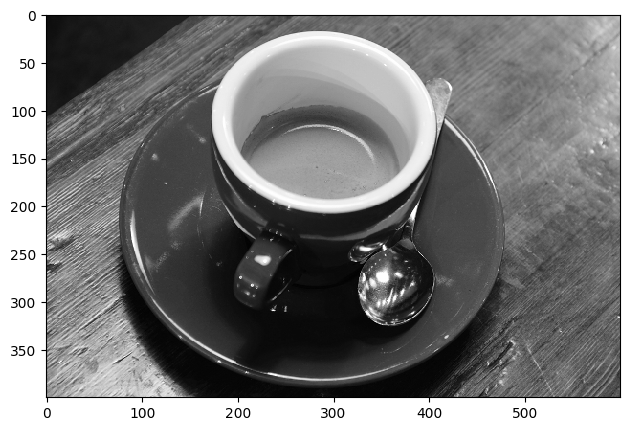

In [38]:
io.imshow(img)

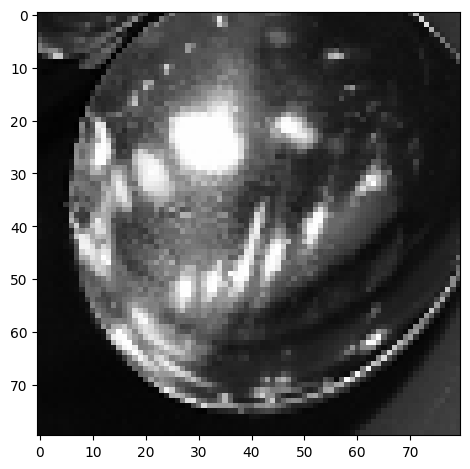

In [39]:
blk = img[250:330,320:400]
blk
io.imshow(blk)

Some utility functions

In [40]:
from skimage.util import view_as_windows as viewW
from skimage.util import view_as_blocks as viewB

def im2col_sliding_strided_v2(A, block_size, stepsize=1):
    a, b = block_size
    return viewW(A, (a,b)).reshape(-1,a*b).T[:,::stepsize]

def im2col_distinct(B, block_size):
    a, b = block_size
    return viewB(B, (a,b)).reshape(-1,a*b).T#[:,::stepsize]

def col2im_sliding(B, block_size, image_size):
    a, b = block_size
    m, n = image_size
    return B.reshape(n-b+1,m-a+1).T 

def col2im_distinct(A, block_size, image_size):
    a, b = block_size
    m, n = image_size
    B = A.reshape((m//a,n//b,a,b)) #C = A.reshape((3,2,2,2))
    return B.transpose([0,2,1,3]).reshape(m,n)#B.reshape(nn-n+1,mm-m+1).T         

In [41]:
A = np.arange(4*6).reshape(4,6)
patch_arr = viewB(A, (2,2))
print(A)
print(patch_arr.shape)
patch_arr

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]]
(2, 3, 2, 2)


array([[[[ 0,  1],
         [ 6,  7]],

        [[ 2,  3],
         [ 8,  9]],

        [[ 4,  5],
         [10, 11]]],


       [[[12, 13],
         [18, 19]],

        [[14, 15],
         [20, 21]],

        [[16, 17],
         [22, 23]]]])

In [42]:
B = im2col_distinct(A,[2, 2])
print(A)
print(B)

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]]
[[ 0  2  4 12 14 16]
 [ 1  3  5 13 15 17]
 [ 6  8 10 18 20 22]
 [ 7  9 11 19 21 23]]


In [43]:
C = col2im_distinct(B.T,[2, 2], [4, 6])
C

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23]])

In [44]:
bs = [2, 2]
x = im2col_distinct(img,bs) 
print(x.shape, x.shape[0]*x.shape[1], m*n/4)

(4, 60000) 240000 60000.0


In [45]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=0).fit(x.T)
# clustering = KMedoids(n_clusters=k, random_state=0).fit(x.T)

C:\Users\m.amintoosi\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [46]:
print(kmeans.cluster_centers_.shape)
labels = kmeans.labels_
print(labels.shape)
cluster_centers = kmeans.cluster_centers_
cluster_centers

(4, 4)
(60000,)


array([[0.52268354, 0.52463973, 0.52423633, 0.52303693],
       [0.08968596, 0.08971989, 0.08917598, 0.08987512],
       [0.79994586, 0.80255419, 0.80365328, 0.80144409],
       [0.3172317 , 0.31510994, 0.31436142, 0.31667701]])

In [47]:
rec_img_centers = cluster_centers[labels]
print(rec_img_centers.shape)

(60000, 4)


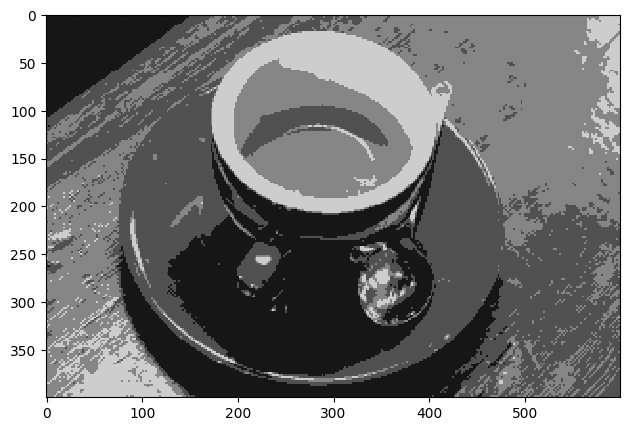

In [48]:
rec_img_blk = col2im_distinct(rec_img_centers,bs,[m,n])
# print(y.shape,imc.shape,type(imc[0,0]))
io.imshow(rec_img_blk)

## Image Compression Using kmeans

C:\Users\m.amintoosi\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0.5, 1.0, 'Pixel Clustering')

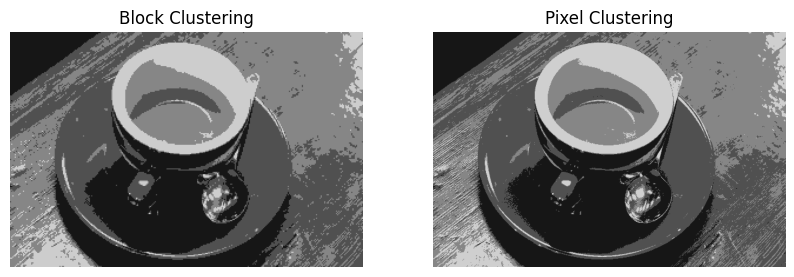

In [58]:
X = img.reshape(-1,1)
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

# replacing each pixel with corresponding cluster center

rec_img_pixels = cluster_centers[labels]
rec_img_pixels = rec_img_pixels.reshape(img.shape)

plt.figure(figsize=(10, 5))
# plt.subplot(1, 3, 1)
# plt.axis("off")
# plt.imshow(img, cmap="gray")

plt.subplot(1, 2, 1)
plt.axis("off")
plt.imshow(rec_img_blk, cmap="gray", vmin=0, vmax=1)
plt.title('Block Clustering')

plt.subplot(1, 2, 2)
plt.axis("off")
plt.imshow(rec_img_pixels, cmap="gray", vmin=0, vmax=1)
plt.title('Pixel Clustering')

In [59]:
cluster_centers

array([[0.52732396],
       [0.0897978 ],
       [0.80943031],
       [0.31605731]])